# Capstone project report - Week 3
## Analysis of tennis tournament data of ATP World Tour
<img src="images/ATP_World_Tour.png" alt="ATP World Tour" style="width: 200px;" align="center"/>
## *Robert Seidl*
Data from https://github.com/JeffSackmann

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144


In [5]:
players = pd.read_csv('atp-data/atp_players.csv', header=None,names = ["playerId", "first_name", "last_name", "hand",'birthdate','nationality'])
players.head()

,playerId,first_name,last_name,hand,birthdate,nationality
0,100001,Gardnar,Mulloy,R,19131122.0,USA
1,100002,Pancho,Segura,R,19210620.0,ECU
2,100003,Frank,Sedgman,R,19271002.0,AUS
3,100004,Giuseppe,Merlo,R,19271011.0,ITA
4,100005,Richard Pancho,Gonzales,R,19280509.0,USA


In [6]:
rankings = pd.read_csv('atp-data/atp_rankings_10s.csv', header=None,names = ["date", "position", "playerId", "points"])
rankings.head()

,date,position,playerId,points
0,20100104,1,103819.0,10550
1,20100104,2,104745.0,9205
2,20100104,3,104925.0,8310
3,20100104,4,104918.0,7030
4,20100104,5,105223.0,6785


## Sample tournament entries



In [48]:
atp_matches2015 = pd.read_csv('atp-data/atp_matches_2015.csv',dtype={'playerId': np.int32},parse_dates=True)
atp_small = atp_matches2015[['tourney_name','surface','winner_name','winner_hand','winner_age','winner_seed','loser_name','loser_hand','loser_age','loser_seed','score','minutes']]
print(atp_small.head())

  tourney_name surface         winner_name winner_hand  winner_age  \
0        Tokyo    Hard  Stanislas Wawrinka           R   30.521561   
1        Tokyo    Hard         Tatsuma Ito           R   27.381246   
2        Tokyo    Hard     Austin Krajicek           L   25.303217   
3        Tokyo    Hard          Joao Sousa           R   26.516085   
4        Tokyo    Hard        Gilles Simon           R   30.770705   

   winner_seed          loser_name loser_hand  loser_age  loser_seed  \
0          1.0      Radek Stepanek          R  36.854209         NaN   
1          NaN  Yoshihito Nishioka          L  20.021903         NaN   
2          NaN       Matthew Ebden          R  27.857632         NaN   
3          NaN     Feliciano Lopez          L  34.039699         7.0   
4          3.0     Mikhail Youzhny          R  33.278576         NaN   

               score  minutes  
0            7-5 6-3      NaN  
1        3-6 6-0 7-5      NaN  
2  5-7 7-6(4) 7-6(5)      NaN  
3        6-4 4-6 6

In [43]:
minutes = atp_small[pd.notnull(atp_small['minutes'])][['minutes','surface']]
minutes["surface"] = minutes["surface"].astype('category')
minutes["surface"].value_counts()

Hard    687
Clay    664
Name: surface, dtype: int64

## Goals
### Descriptive statistics
Provide general statistics of players and matches on ATP tour.  
This may include:
- Percentage of right-handed vs. left-handed players
- Number of tournaments/matches on different surfaces
- Distribution of minutes played for matches on different surfaces 
- Overall distribution of set scores




## Number of tournaments by court surface 

surface
Clay      928
Grass     328
Hard     1702
dtype: int64


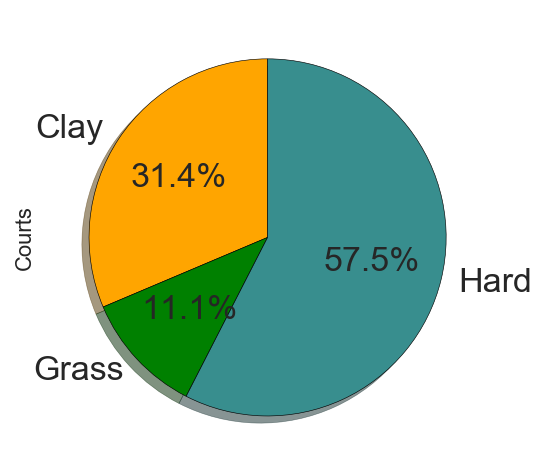

In [61]:
print(atp_small.groupby(['surface']).size())

fig = plt.figure(figsize=(4,4), dpi=200)
ax = plt.subplot(111)

atp_small.groupby(['surface']).size().plot(kind='pie', ax=ax, autopct='%1.1f%%', shadow=True, startangle=90, fontsize=17,colors=('#ffa500','g','#388E8E'));
ax.set_ylabel('Courts');

## Percentage of right-handed vs. left-handed players

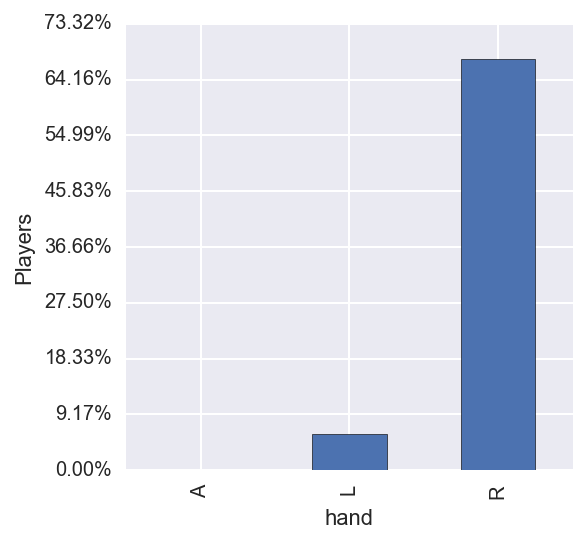

In [63]:
#players['hand'] = players['hand'].astype('category', ordered=True)
players = players[players['hand'] != 'U']

fig = plt.figure(figsize=(4,4), dpi=200);
ax = plt.subplot(111);

players.groupby(['hand']).size().plot(kind='bar', ax=ax);
ax.set_ylabel('Players');

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100/len(players)) for x in vals]);

In [40]:

print(players['hand'].value_counts())
players[players['hand']=='A']
# AMBIDEXTROUS: Beidhaendig

R    14743
L     1306
A        1
Name: hand, dtype: int64


,playerId,first_name,last_name,hand,birthdate,nationality
26080,126096,Charles,Minc,A,19930709.0,FRA


## Number of minutes played on different surfaces
* No minutes for grass court games
* Compare clay and hard courts

/Users/robertseidl/anaconda/envs/datascience/lib/python3.5/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


                  minutes
surface                  
Clay    count  664.000000
        mean   106.103916
        std     39.405955
        min     10.000000
        25%     77.750000
        50%     98.000000
        75%    129.000000
        max    250.000000
Hard    count  687.000000
        mean   104.011645
        std     38.220282
        min      8.000000
        25%     76.000000
        50%     97.000000
        75%    126.000000
        max    252.000000


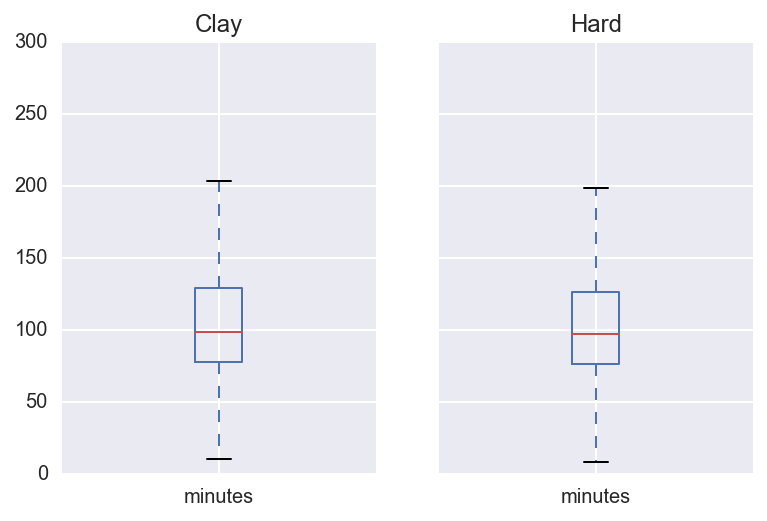

In [49]:
# no grass
grouped = minutes.groupby('surface')
grouped.boxplot()
print(grouped.describe())

In [50]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

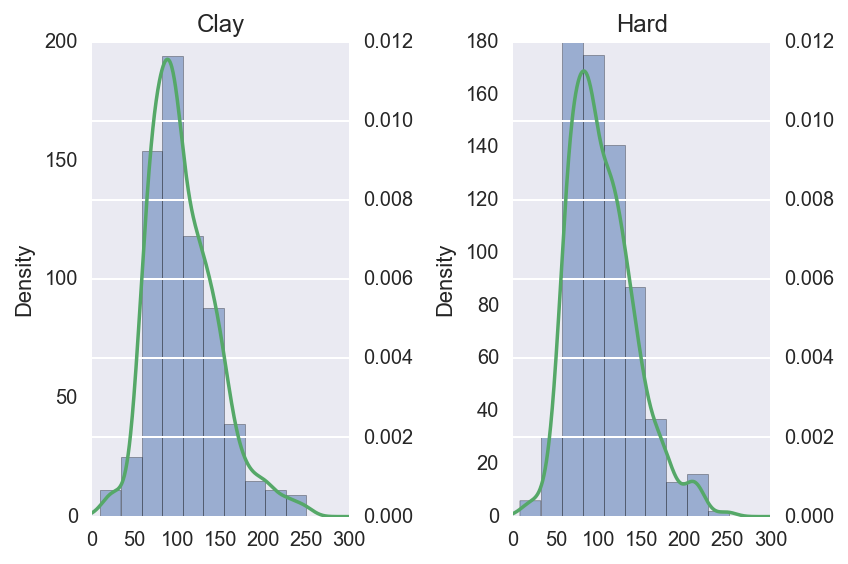

In [65]:
fig, axes = plt.subplots(1, 2);
print(axes)

for index,group in enumerate(grouped):
    ax = axes[index];
    _ = group[1]['minutes'].plot.hist(alpha=0.5, ax=ax);
    ax2 = group[1]['minutes'].plot.kde(ax=ax, secondary_y=True, title=group[0]);
    ax2.set_ylim(0);
    ax2.set_xlim(0,300);

fig.tight_layout();

# Distribution of set scores

In [52]:
tourneys[['score']].head()

,score
0,7-5 6-3
1,3-6 6-0 7-5
2,5-7 7-6(4) 7-6(5)
3,6-4 4-6 6-1
4,6-4 6-4


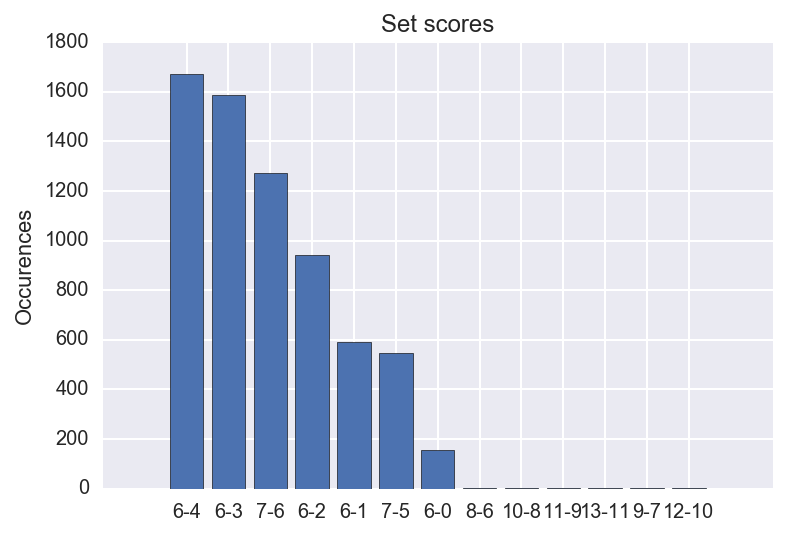

In [71]:
import re
import operator

tourneys = atp_small
tourneys = tourneys[~tourneys['tourney_name'].astype(str).str.startswith('Davis Cup')]
tourneys['tourney_name'].unique()

sets = {}
tourneys['score'].count()
for row in tourneys['score']:
    scores = row.split()
    if scores[-1] != 'W/O':
        for i, score in enumerate(scores if scores[-1] != 'RET' else scores[:-2]):
            if "(" in score:
                score, tiebreak = re.findall('(\d*-\d*)\((\d*)\)',score)[0]
                scores[i] = score
            l,r = score.split("-")
            nscore = score if int(l) > int(r) else score[::-1]
            sets[nscore] = sets.get(nscore,0) + 1
    

sets_sorted = sorted(sets.items(), key=operator.itemgetter(1), reverse=True)
sets_sorted

fig, ax = plt.subplots()
centers = range(len(sets_sorted))
plt.bar(centers, [set[1] for set in sets_sorted], align='center', tick_label=[set[0] for set in sets_sorted]);

ax.set_ylabel('Occurences');
ax.set_title('Set scores');


### Supervised learning
* Train a logistic regression (or more advanced) model to predict a winning probability for a match of a player with certain "features" by training on recent match data. Some of the following data might be considered as features for one or both, winning and losing player:

| Feature        | Attribute           | Type  |
| ------------- |:-------------:| -----:|
| Preferred Hand      | *_hand | CATEGORICAL: Left/Right/Unknown |
| Height of player      | *_ht      |   DOUBLE |
| Age of player | *_age | INTEGER |
| # Aces served | *_ace | INTEGER |
| # Double faults | *_df | INTEGER |
| # Service points played | *_svpt | INTEGER |
| # First serves in | *_1stIn | INTEGER |
| # Points won when first serve in | *_1stWon | INTEGER |
| # Points won when second serve in | *_2ndWon | INTEGER |
| # Service games won | *_SvGms | INTEGER |
| # Break points faced | *_bpFaced | INTEGER |
| # Break points saved | *_bpSaved | INTEGER |
    
* Training a logisitic regression model then allows to observe how the winning probability is affected by varying some of the inputs. Some interesting questions to answer might be:
    * Use Logisitic Regression and LassoCV to train model with most important parameters (only match stats first)
    * How is the winning probability changing when right-handed player would have been left-handed and the other way around? In particular, how much was it worth for Rafa Nadal to be left-handed (given the data)
    * How is the winning probabilty affected by the age of the player? 
    * Is it more important to increase the number of aces or decrease the number of double faults?
    * ...


    
### Unsupervised learning
- The cumulative statistics of all features mentioned above (maybe excluding hand and age) for each player can be used as features for a clustering algorithm like k-means. Players with similar style should be grouped together. Given the features, some of the expected outcomes are:
    - Players who serve strong are grouped together (Federer, Berdych, Cilic, Murray, ...)
    - Players who return strong are grouped together (Djokovic, Murray, Nadal, ...)
    - Players who are good in both (Top 10 players in general) should be grouped together
